In [52]:
import pandas as pd
import os

filepath = 'C:/Users/dmarc/Desktop/Energy_project/data/EWELD_raw/Electricity Consumption/'
sections = os.listdir(filepath)


## STEP 1 Energy consumption all users consolidation
combined_df

In [53]:
dataframes = []

for section in sections:
    section_path = os.path.join(filepath, section)
    if os.path.isdir(section_path):
        divisions = os.listdir(section_path)
        for division in divisions:
            division_path = os.path.join(section_path, division)
            if os.path.isdir(division_path):
                files = os.listdir(division_path)
                csv_files = [f for f in files if f.endswith('.csv')]
                for csv_file in csv_files:
                    file_path = os.path.join(division_path, csv_file)
                    df = pd.read_csv(file_path)
                    df['User'] = os.path.splitext(csv_file)[0]      # e.g., 'U1'
                    df['Division'] = division                       # e.g., 'Division_01'
                    df['Section'] = section                         # e.g., 'Section_A'
                    dataframes.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.head())

                  Time    Value User  \
0  2016-07-12 10:30:00  20.3325   U1   
1  2016-07-12 10:45:00  16.8611   U1   
2  2016-07-12 11:00:00  16.2412   U1   
3  2016-07-12 11:15:00  18.8448   U1   
4  2016-07-12 11:30:00  17.3570   U1   

                                            Division Section  
0  A01 Crop and animal production, hunting and re...       A  
1  A01 Crop and animal production, hunting and re...       A  
2  A01 Crop and animal production, hunting and re...       A  
3  A01 Crop and animal production, hunting and re...       A  
4  A01 Crop and animal production, hunting and re...       A  


In [54]:
combined_df.columns

Index(['Time', 'Value', 'User', 'Division', 'Section'], dtype='object')

In [55]:
# Extract numeric part from 'Division' as 'Division Code'
combined_df['Division Code'] = combined_df['Division'].str.extract(r'(\d+)')

# Extract the text part after the code as 'Division Name'
combined_df['Division Name'] = combined_df['Division'].str.replace(r'^[A-Z]?(\d+)\s*', '', regex=True)

# Replace column name 'Division' with 'Division Code'
combined_df['Division'] = combined_df['Division Code']

# Drop 'Division Code' column 
combined_df.drop(columns=['Division'], inplace=True)
print(combined_df.head())

                  Time    Value User Section Division Code  \
0  2016-07-12 10:30:00  20.3325   U1       A            01   
1  2016-07-12 10:45:00  16.8611   U1       A            01   
2  2016-07-12 11:00:00  16.2412   U1       A            01   
3  2016-07-12 11:15:00  18.8448   U1       A            01   
4  2016-07-12 11:30:00  17.3570   U1       A            01   

                                       Division Name  
0  Crop and animal production, hunting and relate...  
1  Crop and animal production, hunting and relate...  
2  Crop and animal production, hunting and relate...  
3  Crop and animal production, hunting and relate...  
4  Crop and animal production, hunting and relate...  


In [ ]:
# Rename the column 
combined_df = combined_df.rename(columns={'Value': 'Energy_cons [kWh]'})


In [58]:
num_rows_combined_df = len(combined_df)
print(f"Number of rows combined_df: {num_rows_combined_df}")

Number of rows combined_df: 55277891


## STEP 2 Creation user data set for Section C "Manufacturing"
combined_C_df

In [57]:
# filter
combined_C_df = combined_df[combined_df['Section'] == 'C']
combined_C_df

,Time,Energy_cons [kWh],User,Section,Division Code,Division Name
1536781,2017-06-04 00:15:00,1.8156,U11,C,10,Manufacture of food products
1536782,2017-06-04 00:30:00,1.8156,U11,C,10,Manufacture of food products
1536783,2017-06-04 00:45:00,1.8156,U11,C,10,Manufacture of food products
1536784,2017-06-04 01:00:00,1.8156,U11,C,10,Manufacture of food products
1536785,2017-06-04 01:15:00,2.5140,U11,C,10,Manufacture of food products
...,...,...,...,...,...,...
37748213,2019-05-17 14:00:00,19.3786,U255,C,33,Repair and installation of machinery and equip...
37748214,2019-05-17 14:15:00,16.9465,U255,C,33,Repair and installation of machinery and equip...
37748215,2019-05-17 14:30:00,15.8481,U255,C,33,Repair and installation of machinery and equip...
37748216,2019-05-17 14:45:00,16.0835,U255,C,33,Repair and installation of machinery and equip...


In [ ]:
# Drop the unwanted column
combined_C_df = combined_C_df.drop(columns=['Section'])

In [59]:
num_rows = len(combined_df)
print(f"Number of rows all users: {num_rows}")
num_rows_C = len(combined_C_df)
print(f"Number of rows for selected section C: {num_rows_C}")

Number of rows all users: 55277891
Number of rows for selected section C: 36211437


In [61]:
# Show zeros per user in filtered data
zero_counts_C = (combined_C_df == 0).sum()
print("Number of Energy consumption = 0 for user from section C")
zero_counts_C

Number of Energy consumption = 0 for user from section C


Time                       0
Energy_cons [kWh]    8607472
User                       0
Section                    0
Division Code              0
Division Name              0
dtype: int64

In [63]:
# Count total values per user
total_counts = combined_C_df.groupby('User')[['Energy_cons [kWh]']].count()

# Count zeros per user
zero_counts = combined_C_df.groupby('User')[['Energy_cons [kWh]']].apply(lambda x: (x == 0).sum())

# Calculate percentage of zeros
percent_zeros = zero_counts / total_counts * 100

# Rename columns for clarity
zero_counts.columns = ['Energy_cons_zeros']
total_counts.columns = ['Energy_cons_total']
percent_zeros.columns = [ 'Energy_cons_zeros_percent']

# Combine all results into one DataFrame
summary_0_energy = pd.concat([total_counts, zero_counts, percent_zeros], axis=1)

# Round percentage columns
summary_0_energy['Energy_cons_zeros_percent'] = summary_0_energy['Energy_cons_zeros_percent'].round(2)

#sorted summary by the percentage
sorted_0_summary = summary_0_energy.sort_values('Energy_cons_zeros_percent', ascending=False)
print("Zero Values pre users (count and percentage)\n")
print(sorted_0_summary.head(30))

Zero Values pre users (count and percentage)

      Energy_cons_total  Energy_cons_zeros  Energy_cons_zeros_percent
User                                                                 
U106             142345             135853                      95.44
U41              195743             168153                      85.90
U119             181439             135072                      74.44
U104             160511             116518                      72.59
U128             154757             110221                      71.22
U162              98037              68769                      70.15
U117             148552             103927                      69.96
U125             150242              99826                      66.44
U58              140988              88820                      63.00
U229             195743             118991                      60.79
U30              194111             114962                      59.22
U216             154847              91480  

In [64]:
# Calculate total number of users to emiminate if o numbers is > 70%
total_users = len(sorted_0_summary)
detailed_summary = pd.DataFrame({
    'Percentage Range': ['0-30%', '30-50%', '50-70%', '70-100%', 'Total'],
    'User Count': [
        ((sorted_0_summary['Energy_cons_zeros_percent'] <= 30)).sum(),
        ((sorted_0_summary['Energy_cons_zeros_percent'] > 30) & 
         (sorted_0_summary['Energy_cons_zeros_percent'] <= 50)).sum(),
        ((sorted_0_summary['Energy_cons_zeros_percent'] > 50) & 
         (sorted_0_summary['Energy_cons_zeros_percent'] <= 70)).sum(),
        (sorted_0_summary['Energy_cons_zeros_percent'] > 70).sum(),
        total_users
    ],
    'Percentage of Users': [
        f"{((sorted_0_summary['Energy_cons_zeros_percent'] <= 30)).sum() / total_users * 100:.1f}%",
        f"{((sorted_0_summary['Energy_cons_zeros_percent'] > 30) & (sorted_0_summary['Energy_cons_zeros_percent'] <= 50)).sum() / total_users * 100:.1f}%",
        f"{((sorted_0_summary['Energy_cons_zeros_percent'] > 50) & (sorted_0_summary['Energy_cons_zeros_percent'] <= 70)).sum() / total_users * 100:.1f}%",
        f"{(sorted_0_summary['Energy_cons_zeros_percent'] > 70).sum() / total_users * 100:.1f}%",
        '100%'
    ]
})

print("\nDetailed Percentage Distribution of Zero Values in Section C:")
print(detailed_summary.to_string(index=False))


Detailed Percentage Distribution of Zero Values in Section C:
Percentage Range  User Count Percentage of Users
           0-30%         172               70.2%
          30-50%          43               17.6%
          50-70%          24                9.8%
         70-100%           6                2.4%
           Total         245                100%


## STEP 3 Exclude users if their energy consumption remains above 70% for Users

raw_consumption_C

In [ ]:
# List of users to exclude
users_to_exclude = ['U106', 'U41', 'U119', 'U104', 'U128', 'U162']

# Count zeros in original data (BEFORE exclusion)
zeros_before = (combined_C_df['Energy_cons [kWh]'] == 0).sum()
print(f"\nZero count in original data: {zeros_before}")

# Create filtered DataFrame by EXCLUDING these users
raw_consumption_C = combined_C_df[~combined_C_df['User'].isin(users_to_exclude)].copy()

# Verify the users and rows exclusion
print(f"\nOriginal number of users: {combined_C_df['User'].nunique()}")
print(f"Number of users after exclusion: {raw_consumption_C['User'].nunique()}")
print(f"Number of excluded users: {len(users_to_exclude)}")

# Count zeros in filtered data (AFTER exclusion)
zeros_after = (raw_consumption_C['Energy_cons [kWh]'] == 0).sum()
print(f"\nZero count in filtered data: {zeros_after}")

# Calculate how many zeros were excluded by this user filtering
zeros_excluded = zeros_before - zeros_after
print(f"\nNumber of 0 values excluded by user filtering: {zeros_excluded}")

# Print the excluded users
print("\nExcluded users:", users_to_exclude)


Zero count in original data: 8607472

Original number of users: 245
Number of users after exclusion: 239
Number of excluded users: 6

Zero count in filtered data: 7872886

Number of 0 values excluded by user filtering: 734586

Excluded users: ['U106', 'U41', 'U119', 'U104', 'U128', 'U162']


In [81]:
print(type(raw_consumption_C))

<class 'pandas.core.frame.DataFrame'>


## STEP 4 Fill remaining 0 values in Energy_cons [kWh] column with interpolated values 
raw_consumption_C_0_fill

In [100]:
# data frame copy to fill
raw_consumption_C_0_fill = raw_consumption_C.copy()
raw_consumption_C_0_fill

,Time,Energy_cons [kWh],User,Section,Division Code,Division Name
1536781,2017-06-04 00:15:00,1.8156,U11,C,10,Manufacture of food products
1536782,2017-06-04 00:30:00,1.8156,U11,C,10,Manufacture of food products
1536783,2017-06-04 00:45:00,1.8156,U11,C,10,Manufacture of food products
1536784,2017-06-04 01:00:00,1.8156,U11,C,10,Manufacture of food products
1536785,2017-06-04 01:15:00,2.5140,U11,C,10,Manufacture of food products
...,...,...,...,...,...,...
37748213,2019-05-17 14:00:00,19.3786,U255,C,33,Repair and installation of machinery and equip...
37748214,2019-05-17 14:15:00,16.9465,U255,C,33,Repair and installation of machinery and equip...
37748215,2019-05-17 14:30:00,15.8481,U255,C,33,Repair and installation of machinery and equip...
37748216,2019-05-17 14:45:00,16.0835,U255,C,33,Repair and installation of machinery and equip...


In [101]:
# 1. Data preparation - replace zeros with NaN (required for interpolation)
raw_consumption_C_0_fill['Energy_cons [kWh]'] = raw_consumption_C_0_fill['Energy_cons [kWh]'].replace(0, float('nan'))

# 2. Linear interpolation grouped by user
raw_consumption_C_0_fill['Energy_cons_interpolated'] = (
    raw_consumption_C_0_fill
    .groupby('User')['Energy_cons [kWh]']
    .transform(lambda x: x.interpolate(method='linear')))

# 3. For remaining NaNs (at start/end of series) - fill with last known value
raw_consumption_C_0_fill['Energy_cons_interpolated'] = (
    raw_consumption_C_0_fill
    .groupby('User')['Energy_cons_interpolated']
    .transform(lambda x: x.ffill().bfill()))

print(type(raw_consumption_C_0_fill))

<class 'pandas.core.frame.DataFrame'>


In [102]:
# 4. Verification
print("Before interpolation:")
print(f"Zero count: {(raw_consumption_C['Energy_cons [kWh]'] == 0).sum()}")
print(f"NaN count: {raw_consumption_C['Energy_cons [kWh]'].isna().sum()}")
zero_counts_before = (raw_consumption_C['Energy_cons [kWh]'] == 0).sum()

print("\nAfter interpolation:")
print(f"NaN count: {raw_consumption_C_0_fill['Energy_cons_interpolated'].isna().sum()}")

zero_counts_after = (raw_consumption_C_0_fill['Energy_cons [kWh]'] == 0).sum()
print(f"Number of 0 values in Energy_cons [kWh] AFTER manipulation: {zero_counts_after}")
# Calculate how many were excluded
zeros_excluded = zero_counts_before - zero_counts_after
print(f"\nNumber of 0 values excluded: {zeros_excluded}")

print("\nSample rows:")
raw_consumption_C_0_fill.sample(10)[['User', 'Time', 'Energy_cons [kWh]', 'Energy_cons_interpolated']]



Before interpolation:
Zero count: 7872886
NaN count: 0

After interpolation:
NaN count: 0
Number of 0 values in Energy_cons [kWh] AFTER manipulation: 0

Number of 0 values excluded: 7872886

Sample rows:


,User,Time,Energy_cons [kWh],Energy_cons_interpolated
21282683,U144,2016-06-06 04:30:00,2.5963,2.596300
11267169,U73,2019-02-15 15:30:00,1.1227,1.122700
12383004,U80,2021-04-23 02:45:00,28.4607,28.460700
27758970,U191,2018-05-03 07:00:00,0.9289,0.928900
25291532,U171,2018-02-08 18:45:00,1.7369,1.736900
19714102,U133,2020-08-05 11:15:00,NaN,1.248482
25775697,U175,2018-09-30 17:15:00,10.5949,10.594900
31961914,U220,2021-07-11 12:45:00,26.6653,26.665300
19592679,U132,2021-05-03 15:15:00,2.6891,2.689100
21588853,U147,2017-09-05 22:30:00,993.2442,993.244200


In [103]:
print(f"NaN count: {raw_consumption_C_0_fill['Energy_cons [kWh]'].isna().sum()}")
zero_counts_C_0_fill = (raw_consumption_C_0_fill == 0).sum()
zero_counts_C_0_fill

NaN count: 7872886


Time                        0
Energy_cons [kWh]           0
User                        0
Section                     0
Division Code               0
Division Name               0
Energy_cons_interpolated    0
dtype: int64

In [104]:
raw_consumption_C_0_fill.head()


,Time,Energy_cons [kWh],User,Section,Division Code,Division Name,Energy_cons_interpolated
1536781,2017-06-04 00:15:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536782,2017-06-04 00:30:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536783,2017-06-04 00:45:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536784,2017-06-04 01:00:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536785,2017-06-04 01:15:00,2.5140,U11,C,10,Manufacture of food products,2.5140


In [106]:
print("Original Energy_cons [kWh]:")
print(raw_consumption_C_0_fill['Energy_cons [kWh]'].describe())

print("\nInterpolated Energy_cons_interpolated:")
print(raw_consumption_C_0_fill['Energy_cons_interpolated'].describe())

Original Energy_cons [kWh]:
count    2.740572e+07
mean     1.023398e+02
std      2.866657e+02
min      4.992669e-05
25%      5.205700e+00
50%      2.454660e+01
75%      7.604610e+01
max      7.977196e+03
Name: Energy_cons [kWh], dtype: float64

Interpolated Energy_cons_interpolated:
count    3.527860e+07
mean     9.664757e+01
std      2.715120e+02
min      4.992669e-05
25%      5.599400e+00
50%      2.501150e+01
75%      7.169220e+01
max      7.977196e+03
Name: Energy_cons_interpolated, dtype: float64


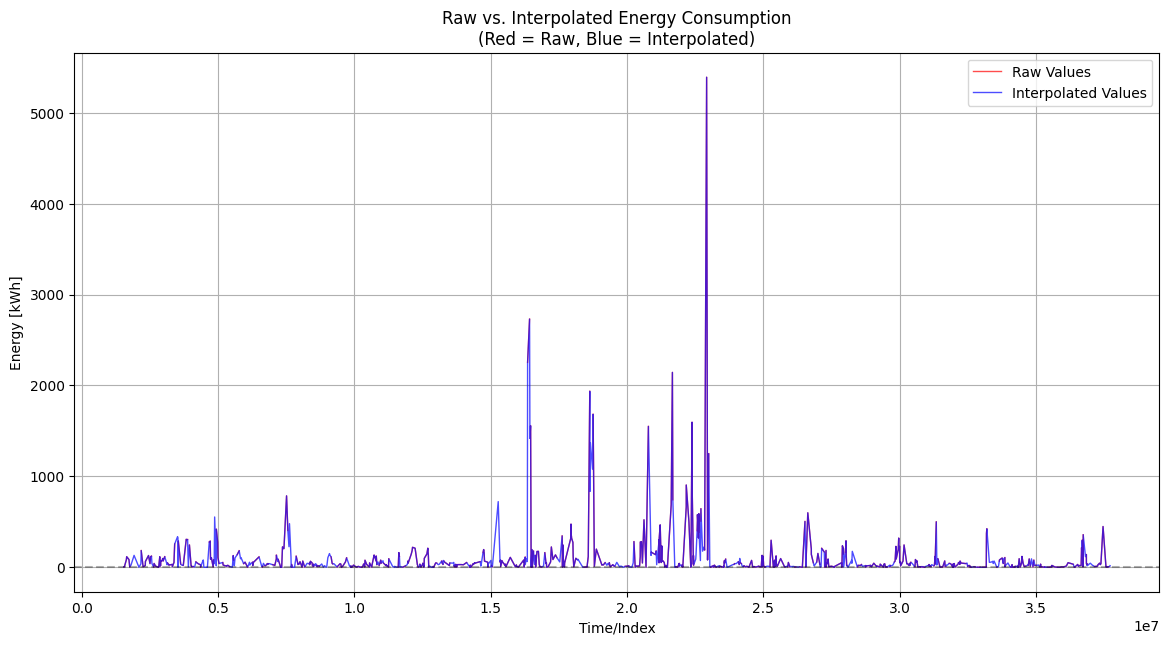

In [107]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(14, 7))

# Sample data (same random sample for both)
sample = raw_consumption_C_0_fill.sample(1000).sort_index()

# Plot RAW data (red)
plt.plot(sample.index, 
         sample['Energy_cons [kWh]'], 
         color='red', 
         alpha=0.7,
         linewidth=1,
         label='Raw Values')

# Plot INTERPOLATED data (blue)
plt.plot(sample.index, 
         sample['Energy_cons_interpolated'], 
         color='blue',
         alpha=0.7, 
         linewidth=1,
         label='Interpolated Values')

# Customize plot
plt.title('Raw vs. Interpolated Energy Consumption\n(Red = Raw, Blue = Interpolated)')
plt.xlabel('Time/Index')
plt.ylabel('Energy [kWh]')
plt.legend()
plt.grid(True)

# Add zero-line reference
plt.axhline(0, color='black', linestyle='--', alpha=0.3)

plt.show()

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


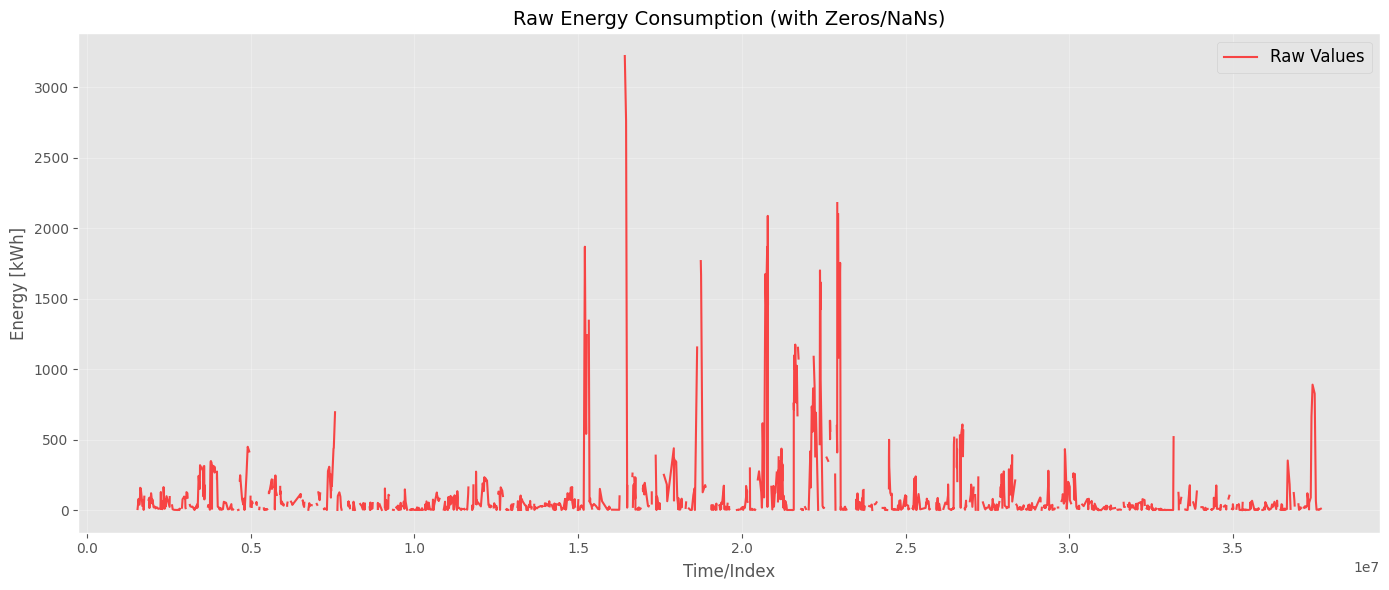

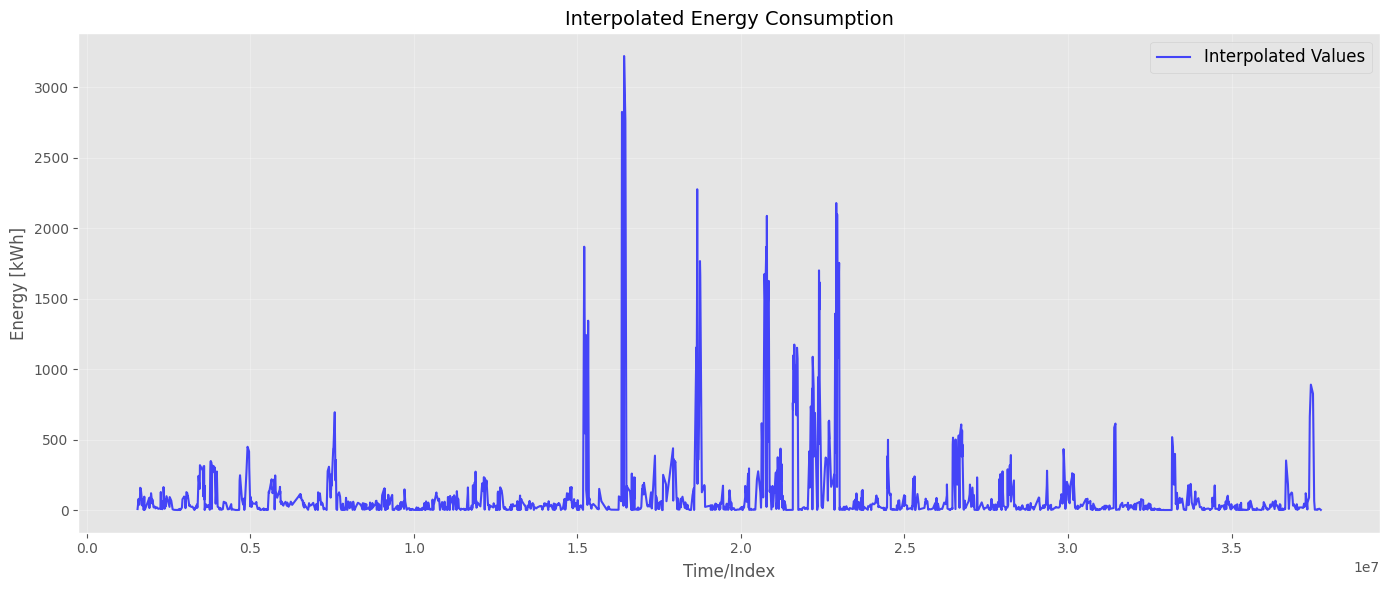

In [108]:
import matplotlib.pyplot as plt

# Set a valid style (check available styles first)
print("Available styles:", plt.style.available)
plt.style.use('ggplot')  # Using ggplot style as it's widely available

# Sample data - ensure consistent sampling
sample_size = min(2000, len(raw_consumption_C_0_fill))
plot_data = raw_consumption_C_0_fill.sample(sample_size, random_state=1).sort_index()

# Chart 1: Raw Energy Consumption
plt.figure(figsize=(14, 6))
plt.plot(plot_data.index, 
         plot_data['Energy_cons [kWh]'],
         color='red',
         alpha=0.7,
         linewidth=1.5,
         label='Raw Values')
plt.title('Raw Energy Consumption (with Zeros/NaNs)', fontsize=14)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)  # This line is now complete
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chart 2: Interpolated Energy Consumption
plt.figure(figsize=(14, 6))
plt.plot(plot_data.index,
         plot_data['Energy_cons_interpolated'],
         color='blue',
         alpha=0.7,
         linewidth=1.5,
         label='Interpolated Values')
plt.title('Interpolated Energy Consumption', fontsize=14)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)  # Complete line
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## STEP 6 Week day, month addition
consumption_C

In [137]:
consumption_C = raw_consumption_C_0_fill.copy()

In [139]:
# Rename the columns
consumption_C = consumption_C.rename(
    columns={
        'Energy_cons_interpolated': 'Energy_int [kWh]', 
        'Energy_cons [kWh]': 'Energy_raw [kWh]',
    }
)

In [140]:
consumption_C

,Time,Energy_raw [kWh],User,Section,Division Code,Division Name,Energy_int [kWh]
1536781,2017-06-04 00:15:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536782,2017-06-04 00:30:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536783,2017-06-04 00:45:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536784,2017-06-04 01:00:00,1.8156,U11,C,10,Manufacture of food products,1.8156
1536785,2017-06-04 01:15:00,2.5140,U11,C,10,Manufacture of food products,2.5140
...,...,...,...,...,...,...,...
37748213,2019-05-17 14:00:00,19.3786,U255,C,33,Repair and installation of machinery and equip...,19.3786
37748214,2019-05-17 14:15:00,16.9465,U255,C,33,Repair and installation of machinery and equip...,16.9465
37748215,2019-05-17 14:30:00,15.8481,U255,C,33,Repair and installation of machinery and equip...,15.8481
37748216,2019-05-17 14:45:00,16.0835,U255,C,33,Repair and installation of machinery and equip...,16.0835


In [141]:
consumption_C.describe()


,Energy_raw [kWh],Energy_int [kWh]
count,2.740572e+07,3.527860e+07
mean,1.023398e+02,9.664757e+01
std,2.866657e+02,2.715120e+02
min,4.992669e-05,4.992669e-05
25%,5.205700e+00,5.599400e+00
50%,2.454660e+01,2.501150e+01
75%,7.604610e+01,7.169220e+01
max,7.977196e+03,7.977196e+03


In [144]:
consumption_C['Energy_raw [kWh]'] = consumption_C['Energy_raw [kWh]'].round(4)
consumption_C['Energy_int [kWh]'] = consumption_C['Energy_int [kWh]'].round(4)

In [153]:
user_comparison = consumption_C.groupby('User').apply(
    lambda x: pd.Series({
        'Total_Energy_Raw': x['Energy_raw [kWh]'].sum(),
        'Total__Energy_Int': x['Energy_int [kWh]'].sum(),
        'Diff_Energy_Total': x['Energy_int [kWh]'].sum() - x['Energy_raw [kWh]'].sum(),
        'Pct_Energy_Change': ((x['Energy_int [kWh]'].sum() - x['Energy_raw [kWh]'].sum()) 
                     / x['Energy_raw [kWh]'].sum() * 100)
    })
)
#sorted summary by the percentage
sorted_user_comparison = user_comparison.sort_values('Pct_Energy_Change', ascending=False)
print("\nRaw vs Interpolated Energy Comparison:")
print(sorted_user_comparison)


Raw vs Interpolated Energy Comparison:
      Total_Energy_Raw  Total__Energy_Int  Diff_Energy_Total  \
User                                                           
U117      1.076866e+06       4.742812e+06       3.665946e+06   
U154      3.537323e+06       1.348101e+07       9.943692e+06   
U229      3.805135e+06       1.173028e+07       7.925149e+06   
U177      2.811933e+05       8.665312e+05       5.853379e+05   
U60       3.526302e+06       1.052251e+07       6.996206e+06   
...                ...                ...                ...   
U90       3.335480e+05       3.335503e+05       2.225000e+00   
U196      2.294260e+06       2.294260e+06       0.000000e+00   
U189      6.723831e+04       6.723831e+04       0.000000e+00   
U185      2.398812e+06       2.398812e+06       0.000000e+00   
U210      6.297087e+06       6.297087e+06       0.000000e+00   

      Pct_Energy_Change  
User                     
U117         340.427196  
U154         281.107838  
U229         208.275089

C:\Users\dmarc\AppData\Local\Temp\ipykernel_30540\160201406.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_comparison = consumption_C.groupby('User').apply(


In [154]:
print("Data types:\n", consumption_C.dtypes)

Data types:
 Time                datetime64[ns]
Energy_raw [kWh]           float64
User                        object
Section                     object
Division Code               object
Division Name               object
Energy_int [kWh]           float64
Week_Day                    object
Week_Day_Num                 int32
Month_Name                  object
dtype: object


In [155]:
# Convert 'Time' column to datetime
consumption_C['Time'] = pd.to_datetime(consumption_C['Time'])
# Add a column with the weekday name (e.g., 'Monday', 'Tuesday')
consumption_C['Week_Day'] = consumption_C['Time'].dt.day_name()
# Add a column with the weekday number (e.g., 'Monday', 'Tuesday')
consumption_C['Week_Day_Num'] = consumption_C['Time'].dt.dayofweek + 1
#Add month name (e.g., 'January')
consumption_C['Month_Name'] = consumption_C['Time'].dt.month_name()

In [ ]:
# shift assignment function
from datetime import datetime, time
def assign_shift(dt):
    t = dt.time()
    if time(6, 0) <= t < time(14, 0):
        return 'First Shift'
    elif time(14, 0) <= t < time(22, 0):
        return 'Second Shift'
    else:
        # Covers 22:00-24:00 and 00:00-06:00
        return 'Third Shift'

# Apply function "assign_shift" to create shift column
consumption_C ['shift'] = consumption_C ['DateTime'].apply(assign_shift)

## merge with UserLocation
cons_City

In [163]:
import os
filepath = r'C:/Users/dmarc/Desktop/Energy_project/data/EWELD_raw/User Location'
# Take all CSV files in folder structure
all_csv_files = []
for root, dirs, files in os.walk(filepath):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            all_csv_files.append(full_path)

print(f"Found {len(all_csv_files)} CSV files total")

Found 3 CSV files total


In [164]:
# List to hold all dataframes
dataframe = []

for file in os.listdir(filepath):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(filepath, file))
        # Add filename column (without .csv)
        df['source_file'] = file[:-4]
        dataframe.append(df)

# List to  dataframes
location_data = pd.concat(dataframe)

In [165]:
# remove the prefix U_
location_data['source_file'] = location_data['source_file'].str.replace('U_', '', regex=False)
#  Rename the column
location_data = location_data.rename(columns={'source_file': 'City', 'User No.': 'User'})


In [166]:
location_data.sample(11)

,User,City
60,U64,CT2
123,U129,CT2
352,U365,CT2
81,U85,CT2
70,U74,CT2
348,U361,CT2
39,U42,CT2
337,U349,CT2
11,U12,CT2
221,U230,CT2


In [167]:
cons_City = consumption_C.copy()

In [168]:
cons_City = pd.merge(
    cons_City ,
    location_data,
    on=['User'],
    how='left'
)


In [169]:
cons_City.head()

,Time,Energy_raw [kWh],User,Section,Division Code,Division Name,Energy_int [kWh],Week_Day,Week_Day_Num,Month_Name,City
0,2017-06-04 00:15:00,1.8156,U11,C,10,Manufacture of food products,1.8156,Sunday,7,June,CT2
1,2017-06-04 00:30:00,1.8156,U11,C,10,Manufacture of food products,1.8156,Sunday,7,June,CT2
2,2017-06-04 00:45:00,1.8156,U11,C,10,Manufacture of food products,1.8156,Sunday,7,June,CT2
3,2017-06-04 01:00:00,1.8156,U11,C,10,Manufacture of food products,1.8156,Sunday,7,June,CT2
4,2017-06-04 01:15:00,2.5140,U11,C,10,Manufacture of food products,2.5140,Sunday,7,June,CT2


## merge with weather data
cons_City_weather

In [170]:
cons_City_weather = cons_City.copy()

In [158]:
weather_data_with_extreme = pd.read_csv(r"C:\Users\dmarc\Desktop\Energy_project\data\processed\weather_data_with_extreme.csv")

In [160]:
# Convert 'Time' column to datetime
weather_data_with_extreme['Time'] = pd.to_datetime(weather_data_with_extreme['Time'])

In [ ]:
weather_data_with_extreme.dtypes

Time               datetime64[ns]
Temperature(C)            float64
Dew Point(C)              float64
Humidity(%)               float64
Wind                       object
Wind Speed(mph)           float64
Wind Gust(mph)            float64
Pressure(hPa)             float64
Condition                  object
City                       object
Extreme Weather            object
EWno                        int64
dtype: object

In [171]:
cons_City_weather = pd.merge(
    cons_City_weather ,
    weather_data_with_extreme,
    on=['Time', 'City'],
    how='left'
)


In [173]:
print("Data types:\n", cons_City_weather.dtypes)

Data types:
 Time                datetime64[ns]
Energy_raw [kWh]           float64
User                        object
Section                     object
Division Code               object
Division Name               object
Energy_int [kWh]           float64
Week_Day                    object
Week_Day_Num                 int32
Month_Name                  object
City                        object
Temperature(C)             float64
Dew Point(C)               float64
Humidity(%)                float64
Wind                        object
Wind Speed(mph)            float64
Wind Gust(mph)             float64
Pressure(hPa)              float64
Condition                   object
Extreme Weather             object
EWno                         int64
dtype: object


## Step 7 Time paterns
consumption_TimeIndex

In [174]:
consumption_TimeIndex = cons_City_weather.copy()

In [ ]:

cons_City_weather = cons_City_weather.sort_values('Time')

# rolling window
window_sizes = [3, 7, 14, 28]  # day windows

for window in window_sizes:
    cons_City_weather[f'Energy_int_Avg_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').mean()
    
    cons_City_weather[f'Energy_int_Median_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').median()
    
    cons_City_weather[f'Energy_int_Std_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').std()
    
    cons_City_weather[f'Energy_int_Sum_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').sum()

print(cons_City_weather[['Time', 'Energy_int [kWh]', 
                         'Energy_int_Avg_3d', 'Energy_int_Median_3d', 
                         'Energy_int_Std_3d', 'Energy_int_Sum_3d']].head(10))

In [175]:
# 'Time' is a datetime  to index
consumption_TimeIndex = consumption_TimeIndex.set_index('Time')

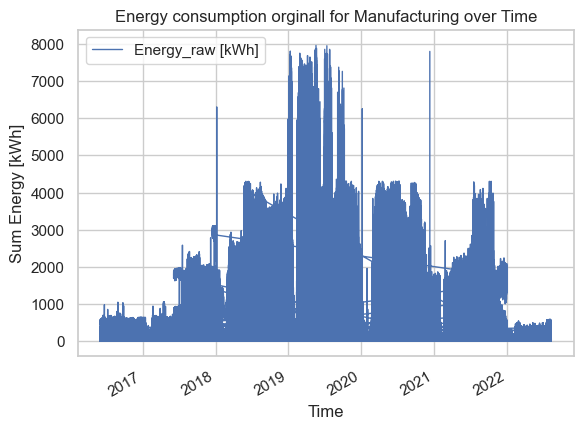

In [ ]:
import matplotlib.pyplot as plt 
#  plot without specifying x, since the index is Time
consumption_TimeIndex['Energy_raw [kWh]'].plot(kind='line', legend=True, linewidth=1, color='b')
plt.title('Energy consumption orginall for Manufacturing over Time')
plt.xlabel('Time')
plt.ylabel('Sum Energy [kWh]')
plt.grid(True)
plt.show()

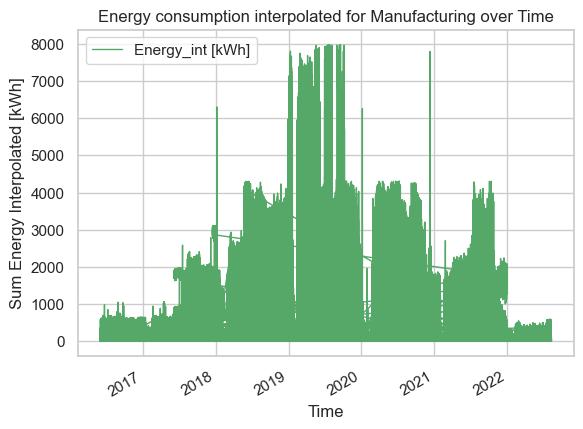

In [176]:
import matplotlib.pyplot as plt 
#  plot without specifying x, since the index is Time
consumption_TimeIndex['Energy_int [kWh]'].plot(kind='line', legend=True, linewidth=1, color='g')
plt.title('Energy consumption interpolated for Manufacturing over Time')
plt.xlabel('Time')
plt.ylabel('Sum Energy Interpolated [kWh]')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
# Create group labels for every 4 rows
rolling1_Ct1_ec_df['hourly_group'] = np.arange(len(rolling1_Ct1_ec_df)) // 4
# Calculate max/min per group
rolling1_Ct1_ec_df['block_hourly_max'] = rolling1_Ct1_ec_df.groupby('hourly_group')['sum energy [kWh]'].transform('max')
rolling1_Ct1_ec_df['block_hourly_min'] = rolling1_Ct1_ec_df.groupby('hourly_group')['sum energy [kWh]'].transform('min')

In [134]:
print("Actual columns in DataFrame:", consumption_C.columns.tolist())

Actual columns in DataFrame: ['User', 'Section', 'Division Code', 'Division Name', 'Energy [kWh]', 'Week_Day', 'Week_Day_Num']


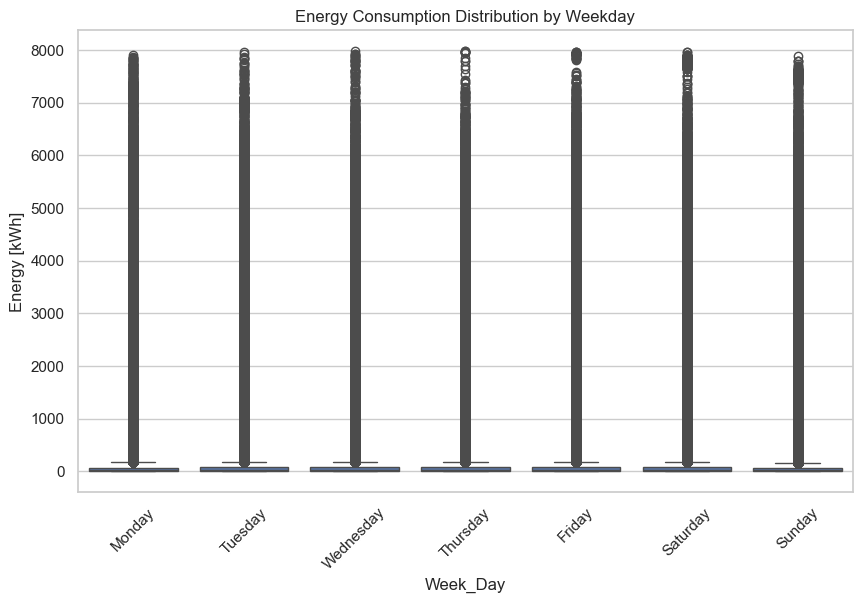

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Week_Day', 
    y='Energy [kWh]', 
    data=consumption_C,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.title('Energy Consumption Distribution by Weekday')
plt.xticks(rotation=45)
plt.show()

In [129]:
consumption_C.columns

Index(['User', 'Section', 'Division Code', 'Division Name', 'Energy [kWh]',
       'Week_Day', 'Week_Day_Num'],
      dtype='object')

In [ ]:
# Drop the unwanted column
consumption_C = consumption_C.drop(columns=['Energy_cons [kWh]'])

# Rename the column
consumption_C = consumption_C.rename(columns={'Energy_cons_interpolated': 'Energy [kWh]'})

# View the result
print(consumption_C.head())

In [76]:
location_data = pd.read_csv(r"C:\Users\dmarc\Desktop\Energy_project\data\processed\location_data.csv")

In [78]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    386 non-null    object
 1   City    386 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [80]:
energy_combined = pd.merge(
    consumption_C,
    location_data[['User', 'City']],
    on='User',
    how='left'
)

In [81]:
#columns with at least one NaN
energy_combined.isna().sum()

Time                       0
User                       0
Section                    0
Division Code              0
Division Name              0
Energy_consumption[kWh]    0
City                       0
dtype: int64

In [86]:
energy_combined.sample(10)


,Time,User,Section,Division Code,Division Name,Energy_consumption[kWh],City
28313070,2021-04-17 10:15:00,U211,C,26,"Manufacture of computer, electronic and optica...",47.1354,CT2
34074806,2021-09-25 04:00:00,U247,C,31,Manufacture of furniture,17.6406,CT2
4895335,2018-08-16 22:45:00,U43,C,14,Manufacture of wearing apparel,4.1413,CT2
11139872,2020-10-08 09:15:00,U84,C,22,Manufacture of rubber and plastics products,1.0205,CT2
20052888,2020-02-14 01:30:00,U153,C,24,Manufacture of basic metals,103.4978,CT2
1393157,2019-08-04 00:30:00,U20,C,11,Manufacture of beverages,75.4230,CT2
16032579,2016-10-17 20:15:00,U122,C,23,Manufacture of other non-metallic mineral prod...,41.2406,CT2
14685246,2018-07-04 02:30:00,U110,C,23,Manufacture of other non-metallic mineral prod...,130.8834,CT2
4612285,2018-05-08 18:30:00,U40,C,13,Manufacture of textiles,45.4127,CT2
1231582,2019-07-23 22:30:00,U19,C,11,Manufacture of beverages,0.1151,CT1


In [88]:
energy_combined['City'].unique()


array(['CT2', 'CT1', 'CT3'], dtype=object)

In [89]:
combined_df.to_parquet(r'C:\Users\dmarc\Desktop\Energy_project\data\processed\energy_combined_C.parquet', index=False)